# An Introduction to Bayesian Statistical Analysis

Before we jump in to model-building and using MCMC to do wonderful things, it is useful to understand a few of the theoretical underpinnings of the Bayesian statistical paradigm. A little theory (and I do mean a *little*) goes a long way towards being able to apply the methods correctly and effectively.

## What *is* Bayesian Statistical Analysis?

Though many of you will have taken a statistics course or two during your undergraduate (or graduate) education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an **entirely different paradigm for doing statistical analysis.**

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, and uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)

This confers several benefits for scientific research, including:

- ease of interpretation
- clear summarization of uncertainty
- ability incorporate uncertainty in parent parameters
- easy to calculate summary statistics
- lego-like model-buliding

## Bayesian vs Frequentist Statistics: What's the difference?

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

![Fisher](images/fisher.png)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of encrusting byrazoans among kelp in coastal Nova Scotia. Our sample includes \\(n\\) sampled kelp plants, \\(y\\) of them being encrusted with bryazoans. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> \\[\hat{p} = \frac{y}{n}\\]
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

# Computational Methods in Bayesian Analysis

The process of conducting Bayesian inference can be broken down into three general steps (Gelman *et al.* 2013):

![](images/123.png)

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Example: binomial calculation

Binomial model is suitable for data that are generated from a sequence of exchangeable Bernoulli trials. These data can be summarized by $y$, the number of times the event of interest occurs, and $n$, the total number of trials. The model parameter is the expected proportion of trials that an event occurs.

$$p(Y|\theta) = \frac{n!}{y! (n-y)!} \theta^{y} (1-\theta)^{n-y}$$

where $y \in \{0, 1, \ldots, n\}$ and $p \in [0, 1]$.

To perform Bayesian inference, we require the specification of a prior distribution. A reasonable choice is a uniform prior on [0,1] which has two implications:

1. makes all probability values equally probable *a priori* 
2. makes calculation of the posterior easy

The second task in performing Bayesian inference is, given a fully-specified model, to calculate a posterior distribution. As we have specified the model, we can calculate a posterior distribution up to a proportionality constant (that is, a probability distribution that is **unnormalized**):

$$P(\theta | n, y) \propto P(y | n, \theta) P(\theta) = \theta^y (1-\theta)^{n-y}$$

We can present different posterior distributions as a function of different realized data.

We can also calculate posterior estimates for $\theta$ by maximizing the unnormalized posterior using optimization. 

### Exercise: posterior estimation

Write a function that returns posterior estimates of a binomial sampling model using a uniform prior on the unknown probability. Plot the posterior densities for each of the following datasets:

1. n=5, y=3
2. n=20, y=12
3. n=100, y=60
4. n=750, y=450

what type of distribution do these plots look like?

In [1]:
n = c(5, 20, 100, 750)
y = c(3, 12, 60, 450)

In [2]:
# Write your answer here

## Estimation, not hypothesis testing

Instead of testing, a more informative and effective approach for inference is based on **estimation** (be it frequentist or Bayesian). That is, rather than testing whether two groups are different, we instead pursue an estimate of *how different* they are, which is fundamentally more informative. 

Additionally, we include an estimate of **uncertainty** associated with that difference which includes uncertainty due to our lack of knowledge of the model parameters (*epistemic uncertainty*) and uncertainty due to the inherent stochasticity of the system (*aleatory uncertainty*).

## One Group

Before we compare two groups using Bayesian analysis, let's start with an even simpler scenario: statistical inference for one group.

For this we will use Gelman et al.'s (2007) now-famous radon dataset. In this dataset the amount of the radioactive gas radon has been measured among different households in all counties of several states. Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among types of soil.

>  the US EPA has set an action level of 4 pCi/L. At or above this level of radon, the EPA recommends you take corrective measures to reduce your exposure to radon gas.

![radon](images/how_radon_enters.jpg)

Let's import the dataset:

In [3]:
RANDOM_SEED = 20090425

In [4]:
radon = read.csv('../data/radon.csv')
head(radon)

,X,idnum,state,state2,stfips,zip,region,typebldg,floor,room,⋯,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,0,5081,MN,MN,27,55735,5,1,1,3,⋯,9.7,1146.4992,1,0,1,AITKIN,27001,0.502054,0,0.83290912
2,1,5082,MN,MN,27,55748,5,1,0,4,⋯,14.5,471.3662,0,0,1,AITKIN,27001,0.502054,0,0.83290912
3,2,5083,MN,MN,27,55748,5,1,0,4,⋯,9.6,433.3167,0,0,1,AITKIN,27001,0.502054,0,1.09861229
4,3,5084,MN,MN,27,56469,5,1,0,4,⋯,24.3,461.6237,0,0,1,AITKIN,27001,0.502054,0,0.09531018
5,4,5085,MN,MN,27,55011,3,1,0,4,⋯,13.8,433.3167,0,0,3,ANOKA,27003,0.428565,1,1.16315081
6,5,5086,MN,MN,27,55014,3,1,0,4,⋯,12.8,471.3662,0,0,3,ANOKA,27003,0.428565,1,0.95551145


Let's focus on the (log) radon levels measured in a single county (Hennepin). 

Suppose we are interested in:

- whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
- the probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

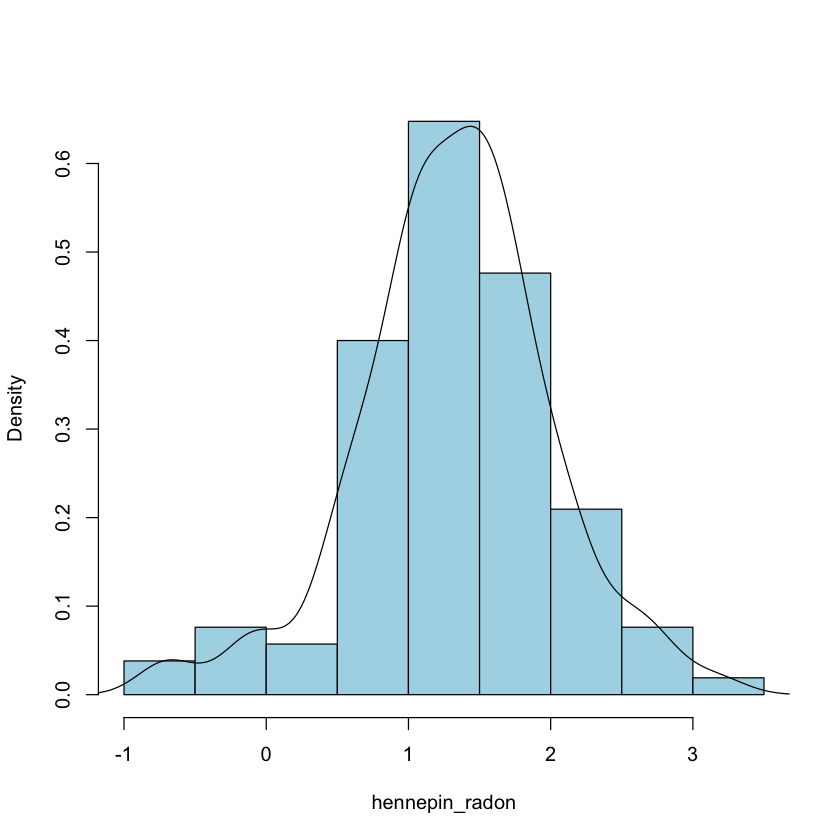

In [5]:
hennepin_radon = radon$log_radon[radon$county=="HENNEPIN"]
hist(hennepin_radon,prob=TRUE,c='lightblue', main="")
lines(density(hennepin_radon), xlab="log_radon")

> ## Software
> Today there is an array of software choices for Bayesians, including both open source software (*e.g.*, Stan, PyMC, JAGS, emcee) and commercial (*e.g.*, SAS, Stata). These examples can be replicated in any of these environments.

### The model

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- a likelihood function(s) for the observations
- priors for all unknown quantities

The measurements look approximately normal, so let's start by assuming a normal distribution as the sampling distribution (likelihood) for the data. 

$$y_i \sim N(\mu, \sigma^2)$$

(don't worry, we can evaluate this assumption)

This implies that we have 2 unknowns in the model; the mean and standard deviation of the distribution. 

#### Prior choice

How do we choose distributions to use as priors for these parameters? 

There are several considerations:

- discrete vs continuous values
- the support of the variable
- the available prior information

While there may likely be prior information about the distribution of radon values, we will assume no prior knowledge, and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use another normal distribution here, and specify a large variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). I will choose a uniform prior bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take.

$$\sigma \sim U(0, 10)$$

We can encode these in an R model, using the RStan package, as follows:

In [6]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

Loading required package: dagitty

rethinking (Version 1.95)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [7]:
radon_model <- alist(
    y ~ normal(mu, sigma),
    mu ~ normal( 0 , 5),
    sigma ~ uniform(0, 5)
)

Before we go ahead and estimate the model paramters from the data, its a good idea to perform a **prior predictive check**. This involves sampling from the model before data are incorporated, and gives you an idea of the range of observations that would be considered reasonable within the scope of the modeling assumptions (including choice of priors). If the simnulations generate too many extreme observations relative to our expectations based on domain knowledge, then it can be an indication of problems with model formulation.

In [8]:
prior_sample = ulam(radon_model)

ERROR: Error in ulam(radon_model): argument "data" is missing, with no default


Now, we will fit the model using **Markov chain Monte Carlo (MCMC)**, which will be covered in detail in an upcoming section. This will draw samples from the posterior distribution (which cannot be calculated exactly).

In [9]:
samples = ulam(radon_model, data=list(y=hennepin_radon))


SAMPLING FOR MODEL '226d4aba67bd114d98757bdf442bb2b7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.012781 seconds (Warm-up)
Chain 1:                0.011223 seconds (Sampling)
Chain 1:      

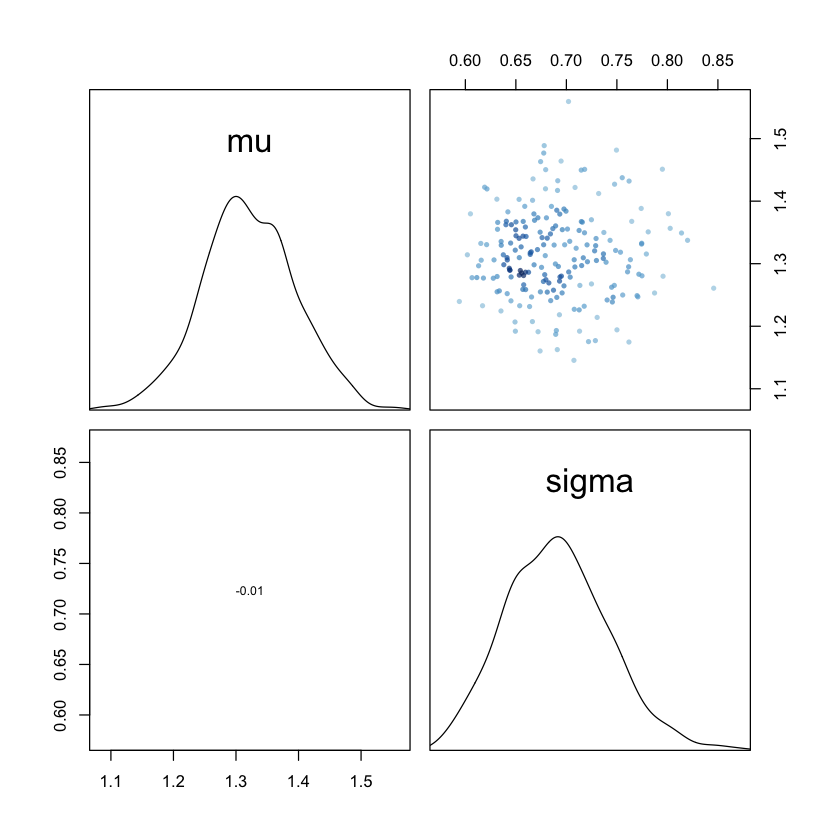

In [17]:
pairs(samples)

In [46]:
sum(extract(samples@stanfit)$mu>log(4))/length(extract(samples@stanfit)$mu)

[1] 0.178

In [47]:
sum(extract(samples@stanfit)$mu<log(4))/length(extract(samples@stanfit)$mu)

[1] 0.822

The plot shows the posterior distribution of $\mu$. 

The output

    82% < 1.38629 < 18%
    
an estimate of the 95% posterior **credible interval**, informing us that the probability of $\mu$ being less than log(4) is 82% and the corresponding probability of being greater than log(4) is 18%.

> The posterior probability that the mean level of household radon in Henneprin County is greater than 4 pCi/L is 0.18.

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**.

$$p(z |y) = \int_{\theta} p(z |\theta) p(\theta | y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

We can estimate this from the posterior samples of the parameters in the model.

In [70]:
mus = extract(samples@stanfit)$mu
sigmas = extract(samples@stanfit)$sigma

In [74]:
radon_samples = rnorm(length(mus), mus,sigmas)

In [77]:
mean((radon_samples>log(4)))

[1] 0.458

> The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is about 0.46.

### Model checking

But, ***how do we know this model is any good?***

Its important to check the fit of the model, to see if its assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from the previous exercise!

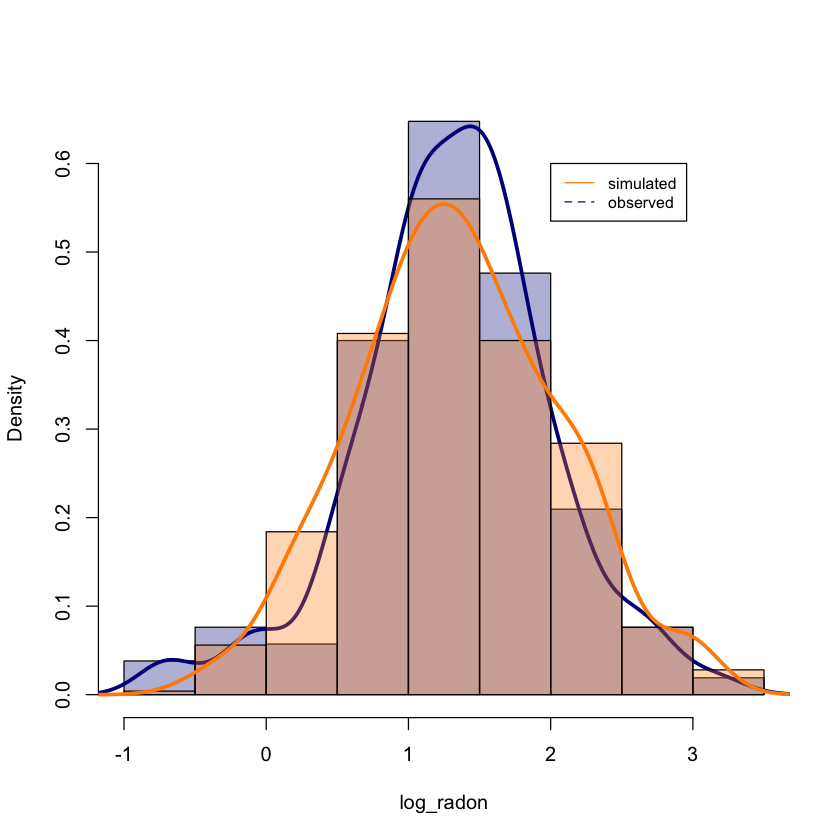

In [95]:
hist(hennepin_radon,prob=TRUE,col='#00008b50', main="", xlab="log_radon")
lines(density(hennepin_radon), col='#00008b', lwd=3)
hist(radon_samples,prob=TRUE,col='#ff8c0050', add=TRUE)
lines(density(radon_samples), col='#ff8c00', lwd=3)
legend(2, .6, legend=c("simulated", "observed"),
       col=c("#ff8c00", "#00008b"), lty=1:2, cex=0.8)

### Prior sensitivity

Its also important to check the sensitivity of your choice of priors to the resulting inference.

Here is the same model, but with drastically different (though still uninformative) priors specified:

In [103]:
prior_sensitivity <- alist(
    y ~ normal(mu, sigma),
    mu ~ normal(0 , 500),
    sigma ~ uniform(0, 500)
)

In [104]:
sensitivity_samples = ulam(prior_sensitivity, data=list(y=hennepin_radon))


SAMPLING FOR MODEL '46492a00e263301e43b35891c380be01' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.011046 seconds (Warm-up)
Chain 1:                0.008688 seconds (Sampling)
Chain 1:   

In [197]:
plot_posterior = function(x,title,xlab){
    hist(x,prob=TRUE,col='#00008b50', main=title, xlab=xlab,ylim=c(0,max(density(x)$y)))
    lines(density(x), col='#00008b', lwd=3)
}

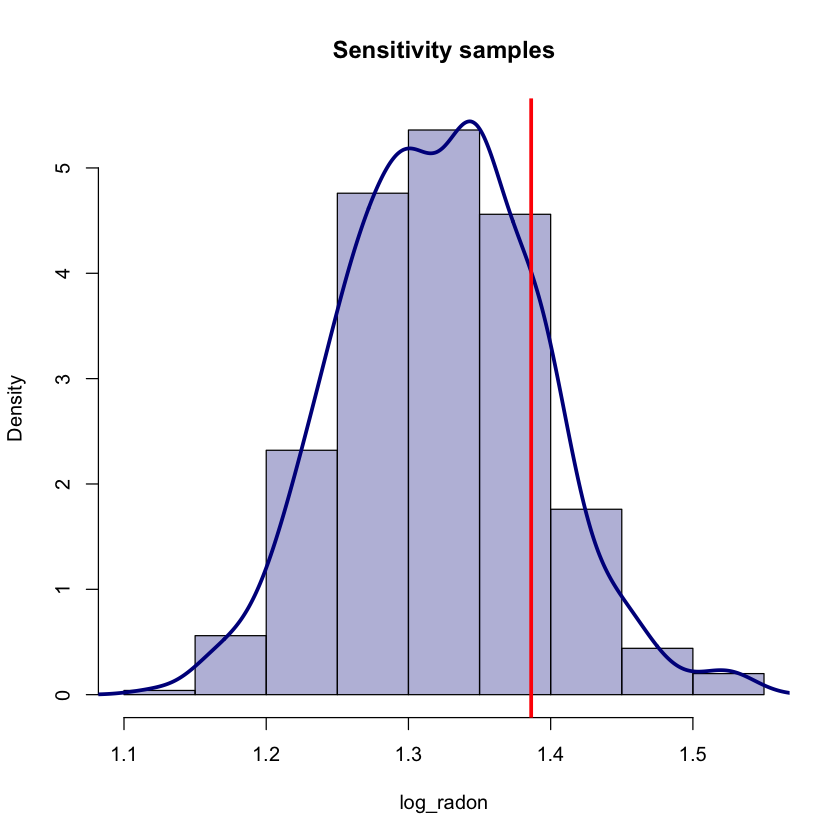

In [198]:
plot_posterior(extract(sensitivity_samples@stanfit)$mu,"Sensitivity samples","log_radon")
abline(v=log(4),lwd=3,col='red')

Here is the original model for comparison:

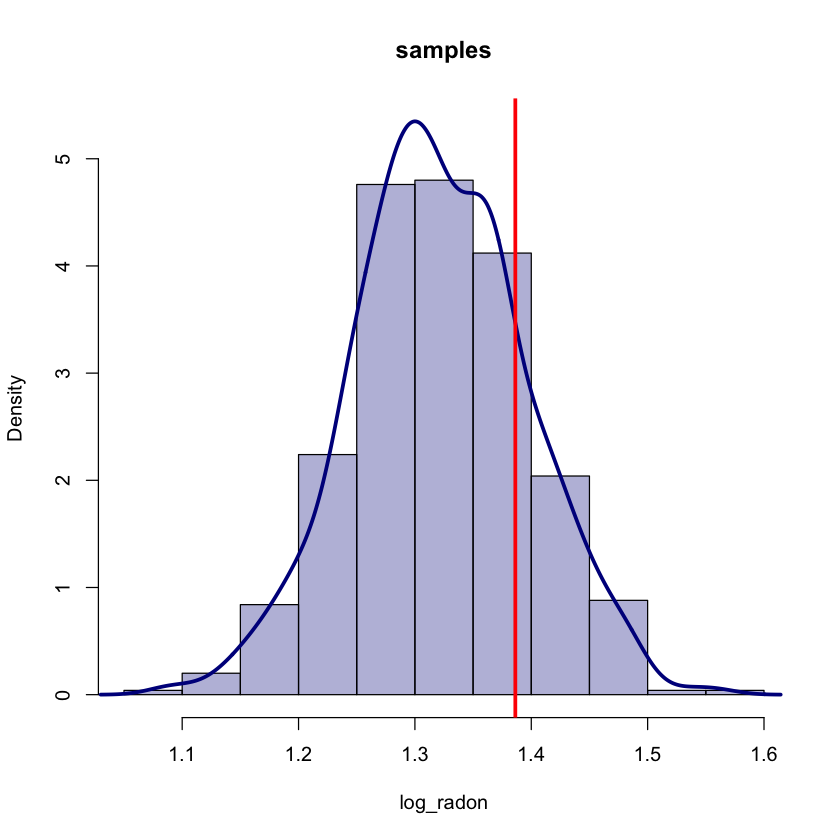

In [199]:
plot_posterior(extract(samples@stanfit)$mu,"samples","log_radon")
abline(v=log(4),lwd=3,col='red')

For some (typically frequentist) people this may seem like a radical departure that totally undermines the analysis. For rational (typically Bayesian) people, this is just fine; we get pretty much the same answer with wildly different priors.

## Two Groups with Continiuous Outcome

To illustrate how this Bayesian estimation approach works in practice, we will use a fictitious example from Kruschke (2012) concerning the evaluation of a clinical trial for drug evaluation. The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment and control arms, respectively.

In [136]:
drug = data.frame('iq'=c(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),'group'='drug')

placebo = data.frame('iq'=c(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),'group'='placebo')

trial_data = rbind(drug,placebo)

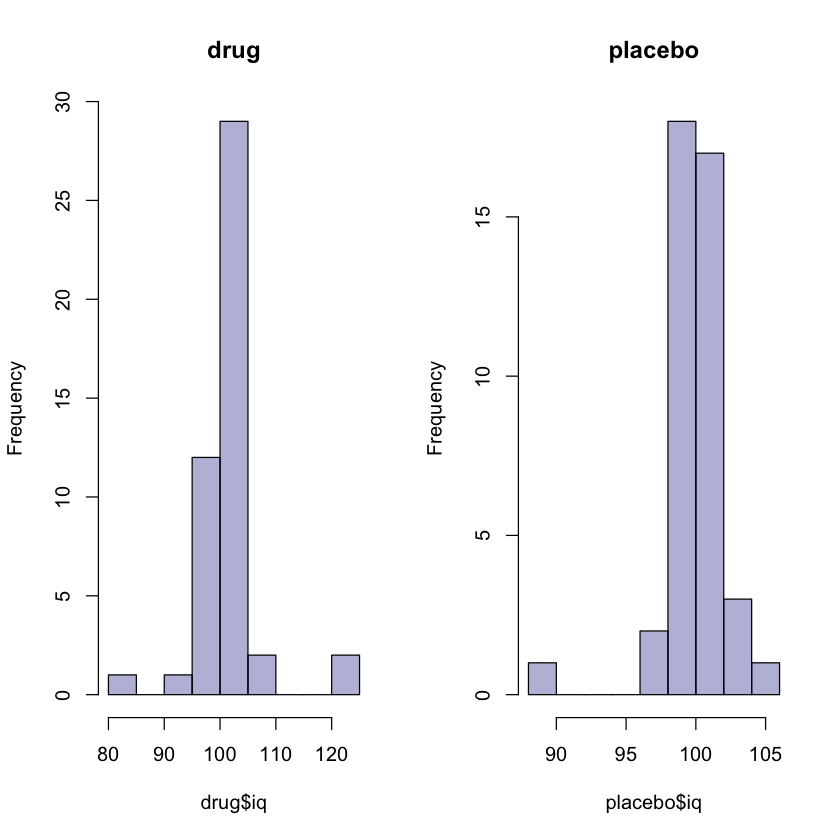

In [176]:
par(mfrow=c(1,2))
hist(drug$iq,col='#00008b50',main='drug')
hist(placebo$iq,col='#00008b50',main='placebo')

Since there appear to be extreme ("outlier") values in the data, we will choose a Student-t distribution to describe the distributions of the scores in each group. This sampling distribution adds **robustness** to the analysis, as a T distribution is less sensitive to outlier observations, relative to a normal distribution. 

The three-parameter Student-t distribution allows for the specification of a mean $\mu$, a precision (inverse-variance) $\lambda$ and a degrees-of-freedom parameter $\nu$:

$$f(x|\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$
           
the degrees-of-freedom parameter essentially specifies the "normality" of the data, since larger values of $\nu$ make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

Thus, the likelihood functions of our model are specified as follows:

$$\begin{align}
y^{(drug)}_i &\sim T(\nu, \mu_1, \sigma_1) \\
y^{(placebo)}_i &\sim T(\nu, \mu_2, \sigma_2)
\end{align}$$

As a simplifying assumption, we will assume that the degree of normality $\nu$ is the same for both groups. 

### Prior choice

Chosing priors is sometimes (nearly always?) tricky. However the world-leading Gelman lab and the associated Stan team have some [good guidance](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations).

Since the means are real-valued, we will apply normal priors. Since we know something about the population distribution of IQ values, we will center the priors at 100, and use a standard deviation that is more than wide enough to account for plausible deviations from this population mean:

$$\mu_k \sim N(100, 10^2)$$

Similarly, we will use a uniform prior for the standard deviations, with an upper bound of 20. For the degrees-of-freedom parameter $\nu$, we will use an **exponential** distribution with a mean of 30; this allocates high prior probability over the regions of the parameter that describe the range from normal to heavy-tailed data under the Student-T distribution.

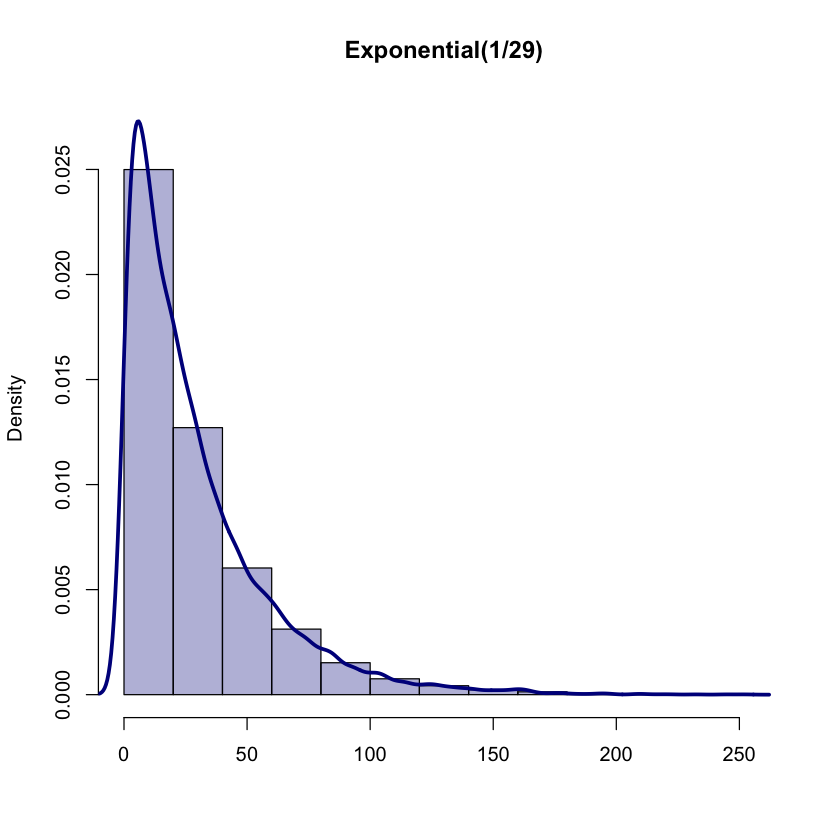

In [200]:
plot_posterior(rexp(10000,1/29),"Exponential(1/29)","")

In [188]:
1/29

[1] 0.03448276

In [189]:
drug_model <- alist(
    mu_0 ~ normal(100, 10),
    mu_1 ~ normal(100, 10),
    sigma_0 ~ exponential(.5),
    sigma_1 ~ exponential(.5),
    nu ~ exponential(0.034),
    drug_y ~ student_t(nu,mu_1,sigma_1**-2),
    placebo_y ~ student_t(nu,mu_0,sigma_0**-2)
)

In [190]:
drug_trace = ulam(drug_model, data=list(drug_y=drug$iq,placebo_y=placebo$iq))


SAMPLING FOR MODEL '7b25d4779f5253db19999d9ce570c5d5' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.064216 seconds (Warm-up)
Chain 1:                0.031958 seconds (Sampling)
Chain 1:   

Now that the model is fully sampled, we can turn our attention to tracking the posterior quantities of interest. Namely, we can calculate the difference in means between the drug and placebo groups.

As a joint measure of the groups, we will also estimate the "effect size", which is the difference in means scaled by the pooled estimates of standard deviation. This quantity can be harder to interpret, since it is no longer in the same units as our data, but it is a function of all four estimated parameters.

In [192]:
sqrt(5)

[1] 2.236068

In [209]:
diff_of_means = extract(drug_trace@stanfit)$mu_1-extract(drug_trace@stanfit)$mu_0
effect_size = diff_of_means/sqrt((extract(drug_trace@stanfit)$sigma_1**2+extract(drug_trace@stanfit)$sigma_0**2)/2)

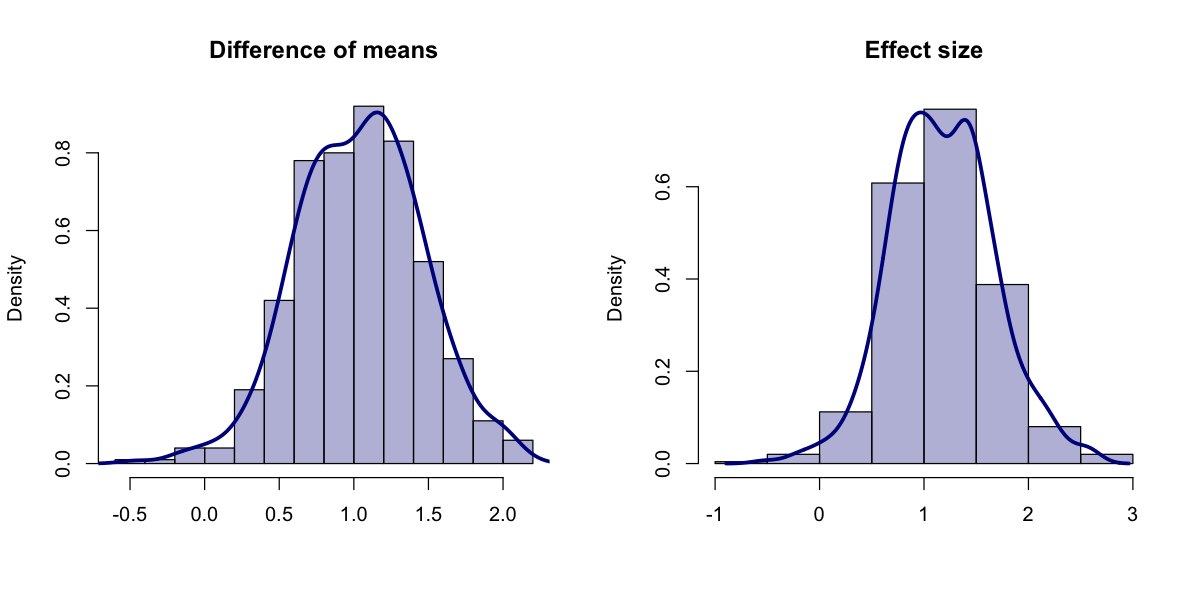

In [222]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot_posterior(diff_of_means,"Difference of means","")
plot_posterior(effect_size,"Effect size","")

In [223]:
sum(diff_of_means>0)/length(diff_of_means)

[1] 0.988

> The posterior probability that the mean IQ of subjects in the treatment group is greater than that of the control group is 0.99.

## Exercise: Two Groups with Binary Outcome

Now that we have seen how to generalize normally-distributed data to another distribution, try our hand with another data type. Binary outcomes are common in biological research: 

- survival/death
- true/false
- presence/absence
- positive/negative

In practice, binary outcomes are encoded as ones (for event occurrences) and zeros (for non-occurrence). A single binary variable is distributed as a **Bernoulli** random variable:

$$f(x \mid p) = p^{x} (1-p)^{1-x}$$

In terms of inference, we are typically interested in whether $p$ is larger or smaller in one group relative to another.

To demonstrate the comparison of two groups with binary outcomes using Bayesian inference, we will use a sample coral reef dataset. Data on 102 reef transects relating to herbivory and coral-algal phase shifts were collected from three reefs on the Great Barrier Reef by the Australian Institute of Marine Science. Of interest is the relationship between a phase shift being present (PS) and the presence of various functional groups of herbivorous fish. 

Results from the original study can be found in [Cheal et al. 2010](https://link.springer.com/article/10.1007/s00338-010-0661-y)

In [224]:
psdata = read.csv('../data/psdata.csv')
head(psdata)

,reef,visit,site,acaneam,acanalgae,acandeter,scaream,sigalgae,total_herbs,coral,algae,PS
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,FITZROY ISLAND REEF,3,1,0,0,3,13,12,28,32.74940,0.000000,0
2,FITZROY ISLAND REEF,3,2,2,7,3,29,9,50,33.20631,0.137931,0
3,FITZROY ISLAND REEF,3,3,1,1,3,11,7,23,25.95713,0.000000,0
4,FITZROY ISLAND REEF,4,1,1,2,1,24,4,32,40.04990,0.000000,0
5,FITZROY ISLAND REEF,4,2,1,1,0,9,16,27,36.83819,0.000000,0
6,FITZROY ISLAND REEF,4,3,3,1,12,26,11,53,31.95169,0.100000,0


To demonstrate binary data analysis, we will try to estimate the difference in the probability of a phase-shift for sites having less than the average number of total herbivores, relative to sites with more than the average number. 

In [233]:
High_herbs = ((psdata$total_herbs>mean(psdata$total_herbs))*1)

Fit a model that evaluates the association of a phase-shift with the probability of having greater or fewer than the average number of herbivorous fish per transect.

In [ ]:
# Write your answer here

---

# References

Gelman, Andrew, John B. Carlin, Hal S. Stern, David B. Dunson, Aki Vehtari, and Donald B. Rubin. 2013. Bayesian Data Analysis, Third Edition. CRC Press.

Pilon, Cam-Davidson. [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)